# Content and Objectives

+ Show validity of the weak law of large numbers

+ First, convergence of sequences to expectation is shown
+ Second, probability of sequences is analyzed and implications are discussed
+ Finally, statistics for state at time T=10 are provided showing that most sequences are converging towards the mean, but other sequences are also possible, albeit being less likely

# Import

In [1]:
# importing
import numpy as np

from scipy import stats, special
from decimal import Decimal

import matplotlib.pyplot as plt
import matplotlib

# showing figures inline
%matplotlib inline

In [2]:
# plotting options 
font = {'size'   : 20}
plt.rc('font', **font)
plt.rc('text', usetex=True)

matplotlib.rc('figure', figsize=(18, 6) )

# Simulation of Sequence of Coins

NOTE: Showing 1000 sequences of length 1000

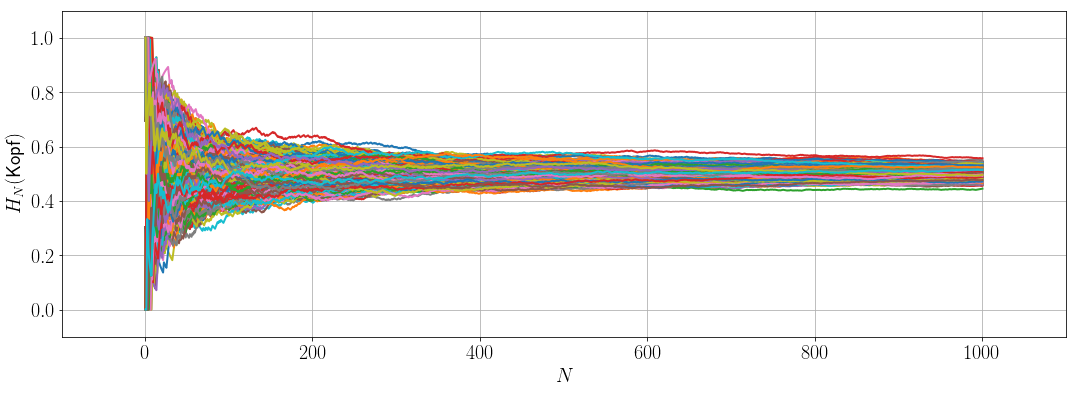

In [3]:
# number of points to be sampled    
len_sequence = 1000
N_sequences = 1000

# initialize storage for sequences
results = np.zeros( ( N_sequences, len_sequence ) )

# vector of lengths in order to perform averaging
lengths = np.arange( 1, len_sequence + 1 )

# loop for sequence length
for n in np.arange( N_sequences ):

    # sample sequence
    sequence = np.random.choice( [ 0 , 1 ], size = len_sequence, p = [ .5, .5 ] )

    # summing up and normalizing
    # NOTE: By doing so, occurences are always normalized to the length of the observation
    results[ n, :] = np.cumsum( sequence ) / lengths


# plotting
for n in np.arange( N_sequences ): 
    plt.plot( range(1, len_sequence+1), results[n, :], linewidth = 2.0 )    

plt.grid( True )
plt.xlabel('$N$')
plt.ylabel('$H_N($'+'Kopf'+'$)$')
plt.margins(.1)


# Discussing Probability of Sequences

+ NOTE: Sequence length is reduced to 100 to get tractable numbers

In [4]:
# number of samples 
N = 100

# probability for sampling 1
p = 0.9

print( 'Model:' )
print( '------\n' )
print( '{} times indenpendently sampling a bit'.format( N ) )
print( 'P( 1 ) = {}\n\n'.format( p ) )

print( 'Results:' )
print( '--------\n' )

print( 'P( 11...11 ) \t\t\t = {}\n'.format( p**N ) )
print( 'P( 10 x 0, 90 x 1 ) \t\t = {}'.format( (1-p)**10 * p**(N-10) ) )
print( 'Binomial coefficient (N, 10) \t = {:.2e}'.format( Decimal( special.binom( N, 10 ) ) ) )
print( '''P( 10 x 0 'somewhere' ) \t = {}'''.format( special.binom( N, 10 ) * (1-p)**10 * p**(N-10) ) )
      


Model:
------

100 times indenpendently sampling a bit
P( 1 ) = 0.9


Results:
--------

P( 11...11 ) 			 = 2.6561398887587544e-05

P( 10 x 0, 90 x 1 ) 		 = 7.61773480458664e-15
Binomial coefficient (N, 10) 	 = 1.73e+13
P( 10 x 0 'somewhere' ) 	 = 0.13186534682448825


# Again: Sequence of Coins

NOTE: Showing 2000 sequences of length 10

<BarContainer object of 19 artists>

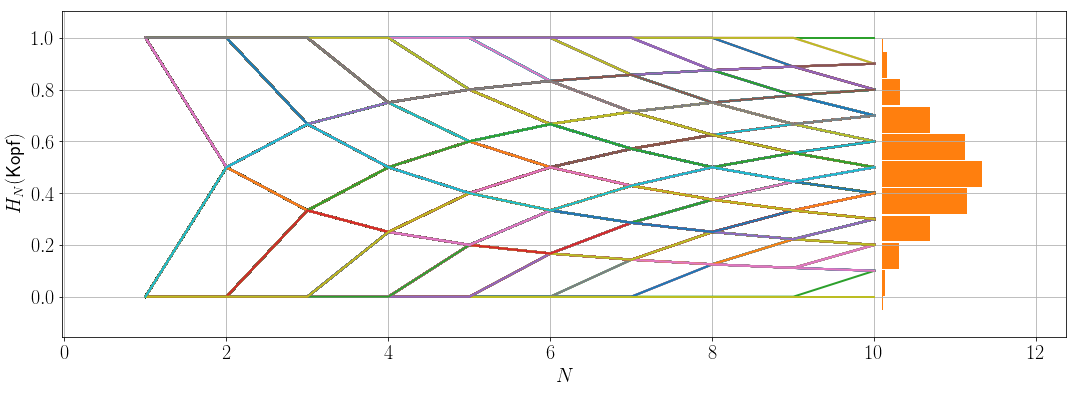

In [5]:
# number of points to be sampled    
len_sequence = 10
N_sequences = 2000

# initialize storage for sequences
results = np.zeros( ( N_sequences, len_sequence ) )

# vector of lengths in order to perform averaging
lengths = np.arange( 1, len_sequence + 1 )

# loop for sequence length
for n in np.arange( N_sequences ):

    # sample sequence
    sequence = np.random.choice( [ 0 , 1 ], size = len_sequence, p = [ .5, .5 ] )

    # summing up and normalizing
    results[ n, :] = np.cumsum( sequence ) / lengths
 


# plotting
for n in np.arange( N_sequences ): 
    plt.plot( range(1, len_sequence+1), results[n, :], linewidth = 2.0 )    

plt.grid( True )
plt.xlabel('$N$')
plt.ylabel('$H_N($'+'Kopf'+'$)$')
plt.margins(.1)


# now determine histogram for the occurrence of end points,
# showing that all points may be observed but likelihood is very different

# extract end-points
results_end = results[:, -1]

# get histogram
num_bins = 20
width = 2/num_bins
bins = np.linspace(0, 1, num_bins, endpoint=True)
r_hist = np.histogram( results_end, bins = bins, density = True )

plt.barh( r_hist[1][:-1], 0 + r_hist[0] / np.sum(r_hist[0]) * 5 , width, left=len_sequence+.1, color = '#ff7f0e' )   